In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point #pull a utility function to add a cyclic point (gets rid of white stripe)

## Load dataset and define desired variable

In [8]:
ds = xr.open_dataset('thetao_Omon_CESM2_omip2_r1i1p1f1_gr_030601-036612.nc') # units of degrees C, levels=33, 180x360 grid
ds.thetao

<xarray.DataArray 'thetao' (time: 732, lev: 33, lat: 180, lon: 360)>
[1565308800 values with dtype=float32]
Coordinates:
  * time     (time) object 0306-01-15 12:00:00 ... 0366-12-15 12:00:00
  * lev      (lev) float64 0.0 10.0 20.0 30.0 ... 4e+03 4.5e+03 5e+03 5.5e+03
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    Diagnostic should be contributed even for models using co...
    frequency:      mon
    id:             thetao
    long_name:      Sea Water Potential Temperature
    mipTable:       Omon
    out_name:       thetao
    prov:           Omon ((isd.003))
    realm:          ocean
    standard_name:  sea_water_potential_temperature
    time:           time
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Water Potential Temperature
    type:           real
    units:          degC
    variable_id:    thetao

In [9]:
ptemp_all_levels = ds['thetao']
ptemp_all_levels.lev # units of m

<xarray.DataArray 'lev' (lev: 33)>
array([   0.,   10.,   20.,   30.,   50.,   75.,  100.,  125.,  150.,  200.,
        250.,  300.,  400.,  500.,  600.,  700.,  800.,  900., 1000., 1100.,
       1200., 1300., 1400., 1500., 1750., 2000., 2500., 3000., 3500., 4000.,
       4500., 5000., 5500.])
Coordinates:
  * lev      (lev) float64 0.0 10.0 20.0 30.0 ... 4e+03 4.5e+03 5e+03 5.5e+03
Attributes:
    axis:           Z
    bounds:         lev_bnds
    long_name:      ocean model level
    positive:       down
    standard_name:  olevel
    units:          m

In [24]:
ptemp = ptemp_all_levels.sel(lev=slice(0,5e+02)) # units of degrees C (and levels are in meters)
ptemp

<xarray.DataArray 'thetao' (time: 732, lev: 14, lat: 180, lon: 360)>
[664070400 values with dtype=float32]
Coordinates:
  * time     (time) object 0306-01-15 12:00:00 ... 0366-12-15 12:00:00
  * lev      (lev) float64 0.0 10.0 20.0 30.0 50.0 ... 250.0 300.0 400.0 500.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    Diagnostic should be contributed even for models using co...
    frequency:      mon
    id:             thetao
    long_name:      Sea Water Potential Temperature
    mipTable:       Omon
    out_name:       thetao
    prov:           Omon ((isd.003))
    realm:          ocean
    standard_name:  sea_water_potential_temperature
    time:           time
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Water Potential Temperature
    type:           real
    units:          degC
    variable_id:    thetao

/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


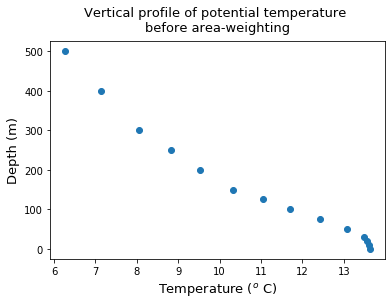

In [39]:
fig, ax = plt.subplots()
ax.plot(ptemp.mean('time').mean('lat').mean('lon'), ptemp.lev, 'o')
ax.set_title('Vertical profile of potential temperature \nbefore area-weighting', fontsize=13, pad=10)
ax.set_xlabel('Temperature ($^{o}$ C)', fontsize=13)
ax.set_ylabel('Depth (m)', fontsize=13)
ax.grid('');

## Load TAREA and define desired variable

In [4]:
ds2 = xr.open_dataset('TAREA_1degx1deg.nc') # units of m^2, 1x1 degree mesh (generated by Riley Brady)
ds2.TAREA

<xarray.DataArray 'TAREA' (lat: 180, lon: 360)>
array([[1.078962e+08, 1.078962e+08, 1.078962e+08, ..., 1.078962e+08,
        1.078962e+08, 1.078962e+08],
       [3.236558e+08, 3.236558e+08, 3.236558e+08, ..., 3.236558e+08,
        3.236558e+08, 3.236558e+08],
       [5.393169e+08, 5.393169e+08, 5.393169e+08, ..., 5.393169e+08,
        5.393169e+08, 5.393169e+08],
       ...,
       [5.393169e+08, 5.393169e+08, 5.393169e+08, ..., 5.393169e+08,
        5.393169e+08, 5.393169e+08],
       [3.236558e+08, 3.236558e+08, 3.236558e+08, ..., 3.236558e+08,
        3.236558e+08, 3.236558e+08],
       [1.078962e+08, 1.078962e+08, 1.078962e+08, ..., 1.078962e+08,
        1.078962e+08, 1.078962e+08]])
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Attributes:
    units:        m^2
    description:  Uses MATLAB's `areaquad` to compute the gridcell area on a ...
    contact:      Riley X. Brady <riley.brady@colorado.edu>

In [5]:
TAREA = ds2['TAREA'] # units are m^2

In [40]:
# match lat/lon of TAREA to ptemp
# find function that will match
TAREA['lat'] = ptemp['lat']
TAREA['lon'] = ptemp['lon']
TAREA

<xarray.DataArray 'TAREA' (lat: 180, lon: 360)>
array([[1.078962e+08, 1.078962e+08, 1.078962e+08, ..., 1.078962e+08,
        1.078962e+08, 1.078962e+08],
       [3.236558e+08, 3.236558e+08, 3.236558e+08, ..., 3.236558e+08,
        3.236558e+08, 3.236558e+08],
       [5.393169e+08, 5.393169e+08, 5.393169e+08, ..., 5.393169e+08,
        5.393169e+08, 5.393169e+08],
       ...,
       [5.393169e+08, 5.393169e+08, 5.393169e+08, ..., 5.393169e+08,
        5.393169e+08, 5.393169e+08],
       [3.236558e+08, 3.236558e+08, 3.236558e+08, ..., 3.236558e+08,
        3.236558e+08, 3.236558e+08],
       [1.078962e+08, 1.078962e+08, 1.078962e+08, ..., 1.078962e+08,
        1.078962e+08, 1.078962e+08]])
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Attributes:
    units:        m^2
    description:  Uses MATLAB's `areaquad` to compute the gridcell area on a ...
    contact:      Riley X. Brady <riley.brady@colorado.edu>

## Convert units

In [ ]:
TAREA

In [41]:
# the step below adds an area component but also cancels out the m^2 unit 
potential_temperature = ptemp * TAREA / TAREA.sum()
potential_temperature

<xarray.DataArray (time: 732, lev: 14, lat: 180, lon: 360)>
array([[[[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         ...,
         [-1.90787679e-06, -1.90831959e-06, -1.90875911e-06, ...,
          -1.90647655e-06, -1.90692451e-06, -1.90741130e-06],
         [-1.13840912e-06, -1.13855004e-06, -1.13867780e-06, ...,
          -1.13787281e-06, -1.13806502e-06, -1.13824512e-06],
         [-3.77256953e-07, -3.77277757e-07, -3.77297401e-07, ...,
          -3.77224600e-07, -3.77236502e-07, -3.77246538e-07]],

        [[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
...
         [ 7.05848825e-07,  7.13583511e-07,  7.21610119e-07, ...,
           6.83105528e-07,  6.90224669e-07,  6.98034604e-07],
         [ 3.70155689e-07,  3.72628797e-07,  3.75023766e-07, ...,
           3.62080463e-07,  3.64869419e-07,  3.67567149e-07],
         [ 1.06059932e-07,  1.06474523e-07,  1.06888534e-07, ...,
           1.05215110e-07,  1.05496095e-07,  1.05770972e-07]],

        [[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         ...,
         [ 8.50979371e-07,  8.58672336e-07,  8.66656403e-07, ...,
           8.28483313e-07,  8.35540124e-07,  8.43252563e-07],
         [ 4.70726436e-07,  4.73252949e-07,  4.75727835e-07, ...,
           4.62588011e-07,  4.65374735e-07,  4.68094326e-07],
         [ 1.44284016e-07,  1.44736861e-07,  1.45194396e-07, ...,
           1.43318550e-07,  1.43636359e-07,  1.43951494e-07]]]])
Coordinates:
  * time     (time) object 0306-01-15 12:00:00 ... 0366-12-15 12:00:00
  * lev      (lev) float64 0.0 10.0 20.0 30.0 50.0 ... 250.0 300.0 400.0 500.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5

In [42]:
potential_temperature = ((potential_temperature).sum(['lat','lon']))
potential_temperature

<xarray.DataArray (time: 732, lev: 14)>
array([[13.1978332 , 13.1864158 , 13.15158287, ...,  6.69969102,
         5.82970122,  5.02563213],
       [13.22763461, 13.2190924 , 13.19747554, ...,  6.6994107 ,
         5.82903919,  5.02518474],
       [13.18916303, 13.18085935, 13.1619179 , ...,  6.69890748,
         5.82706447,  5.02377538],
       ...,
       [13.07428986, 13.06567691, 13.04589662, ...,  6.6937904 ,
         5.82333678,  5.01779585],
       [13.04768866, 13.03787851, 13.01291668, ...,  6.69402766,
         5.82264621,  5.01701019],
       [13.1150648 , 13.10254954, 13.06576569, ...,  6.69560874,
         5.82433147,  5.01836993]])
Coordinates:
  * time     (time) object 0306-01-15 12:00:00 ... 0366-12-15 12:00:00
  * lev      (lev) float64 0.0 10.0 20.0 30.0 50.0 ... 250.0 300.0 400.0 500.0

In [51]:
levels = potential_temperature['lev']

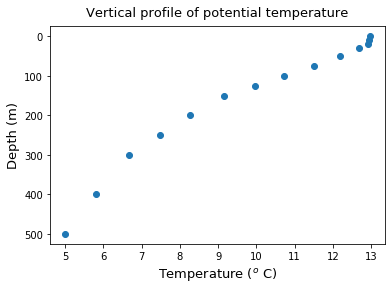

In [52]:
fig, ax = plt.subplots()
ax.plot(potential_temperature.mean('time'), levels, 'o')
ax.invert_yaxis()
ax.set_title('Vertical profile of potential temperature', fontsize=13, pad=10)
ax.set_xlabel('Temperature ($^{o}$ C)', fontsize=13)
ax.set_ylabel('Depth (m)', fontsize=13)
ax.grid('');
# plt.savefig('006a.png', dpi=400)